In [1]:
import pandas as pd
import datetime
#import matplotlib
import numpy as np

In [2]:
county = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [3]:
county

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
1673657,2021-08-31,Sweetwater,Wyoming,56037.0,5617,49.0
1673658,2021-08-31,Teton,Wyoming,56039.0,4427,11.0
1673659,2021-08-31,Uinta,Wyoming,56041.0,2971,15.0
1673660,2021-08-31,Washakie,Wyoming,56043.0,1036,27.0


In [4]:
today = datetime.date.today()
print(today)
output = 'output/capital_comparison_' + str(today) + '.jpg'
date_title = 'COVID-19 Cases in the Capital Region (' + str(today) + ")"

2021-09-01


In [5]:
# convert dates
county['date'] = pd.to_datetime(county['date'])

In [7]:
print(county.describe(include='all', datetime_is_numeric=True))

                                 date      county    state          fips  \
count                         1673662     1673662  1673662  1.658445e+06   
unique                            NaN        1930       55           NaN   
top                               NaN  Washington    Texas           NaN   
freq                              NaN       16310   128724           NaN   
mean    2020-12-15 22:00:34.527401984         NaN      NaN  3.136112e+04   
min               2020-01-21 00:00:00         NaN      NaN  1.001000e+03   
25%               2020-08-10 00:00:00         NaN      NaN  1.901500e+04   
50%               2020-12-17 00:00:00         NaN      NaN  3.000300e+04   
75%               2021-04-25 00:00:00         NaN      NaN  4.610700e+04   
max               2021-08-31 00:00:00         NaN      NaN  7.803000e+04   
std                               NaN         NaN      NaN  1.632865e+04   

               cases        deaths  
count   1.673662e+06  1.635947e+06  
unique       

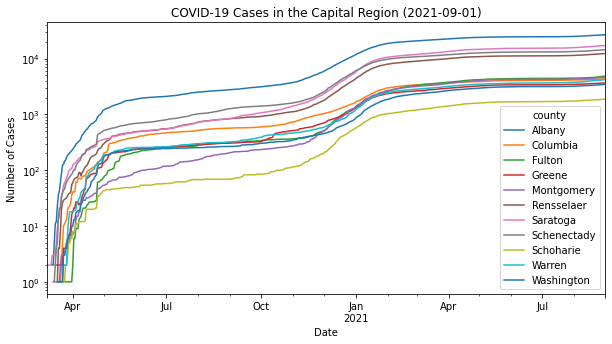

In [8]:
# Set the names of the county
cr = ['Albany', 'Columbia', 'Fulton', 'Greene', 'Montgomery', 'Rensselaer', 
      'Saratoga', 'Schenectady', 'Schoharie', 'Warren', 'Washington']

# select only the data from NY where the county names are in the list above
alb =  county[(county['state'] == 'New York') & (county['county'].isin(cr)) & (county['cases'] > 0)]

# create a plot of cases by county
county_plot = alb.groupby(['date', 'county'])['cases'].sum().unstack().plot(logy=True, figsize=(10,5))
county_plot.set(xlabel='Date', ylabel='Number of Cases', title=date_title)
county_plot.get_figure()

# Save the figure
county_plot.get_figure().savefig(output, bbox_inches='tight', dpi=300)

In [9]:
output2 = 'output/capital_region_total' + str(today) + '.jpg'

In [10]:
# Set the names of the county
cr = ['Albany', 'Columbia', 'Fulton', 'Greene', 'Montgomery', 'Rensselaer', 
      'Saratoga', 'Schenectady', 'Schoharie', 'Warren', 'Washington']
#I set a region column
county['Region'] = np.where(county['county'].isin(cr), 'Captial Region', 'None')
date_title2 = 'COVID-19 Total Cases in the Capital Region (' + str(today) + ")"
county

,date,county,state,fips,cases,deaths,Region
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,None
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,None
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,None
3,2020-01-24,Cook,Illinois,17031.0,1,0.0,None
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0,None
...,...,...,...,...,...,...,...
1673657,2021-08-31,Sweetwater,Wyoming,56037.0,5617,49.0,None
1673658,2021-08-31,Teton,Wyoming,56039.0,4427,11.0,None
1673659,2021-08-31,Uinta,Wyoming,56041.0,2971,15.0,None
1673660,2021-08-31,Washakie,Wyoming,56043.0,1036,27.0,None


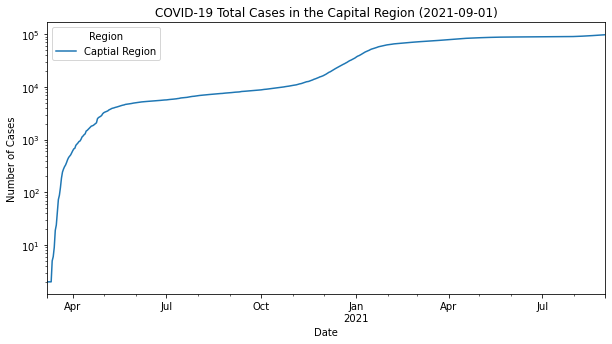

In [11]:
#I did this plot two ways First by grouping region second by undoing the unstack

# Set the names of the county
cr = ['Albany', 'Columbia', 'Fulton', 'Greene', 'Montgomery', 'Rensselaer', 
      'Saratoga', 'Schenectady', 'Schoharie', 'Warren', 'Washington']

# select only the data from NY where the county names are in the list above
alb =  county[(county['state'] == 'New York') & (county['county'].isin(cr)) & (county['cases'] > 0)]

# create a plot of cases by county
county_plot = alb.groupby(['date', 'Region'])['cases'].sum().unstack().plot(logy=True, figsize=(10,5))
county_plot.set(xlabel='Date', ylabel='Number of Cases', title=date_title2)
county_plot.get_figure()

# Save the figure
county_plot.get_figure().savefig(output2, bbox_inches='tight', dpi=300)

In [12]:
output3 = f'output/county_deaths {today}.jpeg'
print(output3)
date_title3 = 'COVID-19 Deaths in the Capital Region (' + str(today) + ")"

output/county_deaths 2021-09-01.jpeg


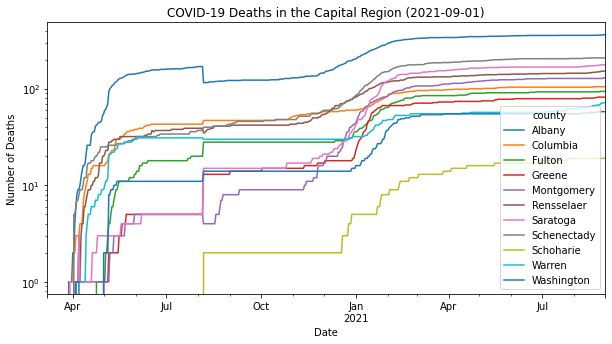

In [13]:
# Set the names of the county
cr = ['Albany', 'Columbia', 'Fulton', 'Greene', 'Montgomery', 'Rensselaer', 
      'Saratoga', 'Schenectady', 'Schoharie', 'Warren', 'Washington']

# select only the data from NY where the county names are in the list above
alb =  county[(county['state'] == 'New York') & (county['county'].isin(cr))]

# create a plot of cases by county
county_plot = alb.groupby(['date', 'county'])['deaths'].sum().unstack().plot(logy=True, figsize=(10,5))
county_plot.set(xlabel='Date', ylabel='Number of Deaths', title=date_title3)
county_plot.get_figure()

# Save the figure
county_plot.get_figure().savefig(output3, bbox_inches='tight', dpi=300)

              date       county     state     fips  cases  deaths  \
717     2020-03-07     Saratoga  New York  36091.0      2     0.0   
822     2020-03-08     Saratoga  New York  36091.0      2     0.0   
949     2020-03-09     Saratoga  New York  36091.0      2     0.0   
1100    2020-03-10     Saratoga  New York  36091.0      2     0.0   
1287    2020-03-11     Saratoga  New York  36091.0      2     0.0   
...            ...          ...       ...      ...    ...     ...   
1672301 2021-08-31     Saratoga  New York  36091.0  17230   177.0   
1672302 2021-08-31  Schenectady  New York  36093.0  14454   209.0   
1672303 2021-08-31    Schoharie  New York  36095.0   1888    19.0   
1672313 2021-08-31       Warren  New York  36113.0   4207    72.0   
1672314 2021-08-31   Washington  New York  36115.0   3462    58.0   

                 Region  
717      Captial Region  
822      Captial Region  
949      Captial Region  
1100     Captial Region  
1287     Captial Region  
...            

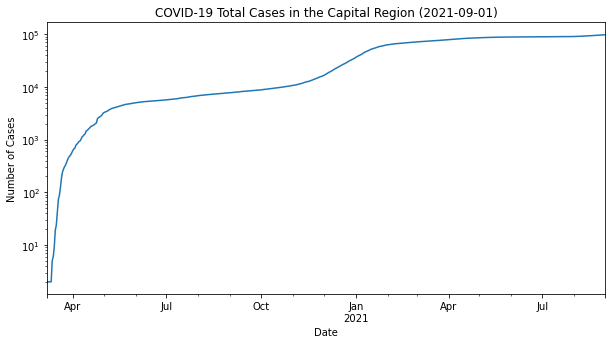

In [14]:
#Second solution I did by undoing the unstack

output2 = 'output/capital_region_total' + str(today) + '.jpg'
# Set the names of the county
cr = ['Albany', 'Columbia', 'Fulton', 'Greene', 'Montgomery', 'Rensselaer', 
      'Saratoga', 'Schenectady', 'Schoharie', 'Warren', 'Washington']

# select only the data from NY where the county names are in the list above
alb =  county[(county['state'] == 'New York') & (county['county'].isin(cr)) & (county['cases'] > 0)]
print(alb)
# create a plot of cases by county
county_plot = alb.groupby(['date'])['cases'].sum().plot(logy=True, figsize=(10,5))
county_plot.set(xlabel='Date', ylabel='Number of Cases', title=date_title2)
county_plot.get_figure()

# Save the figure
county_plot.get_figure().savefig(output2, bbox_inches='tight', dpi=300)